# Intro to ML Project
## Task 1a
### Jan Bauer, Alaisha Sharma

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

%matplotlib inline

In [60]:
train_data = pd.read_csv("data/train.csv")
train_data = train_data.drop(columns=['Id'])
train_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,508.451970,0.886865,0.400531,1.103694,0.135455,8.148069,9.787555,79.749674,0.045166,1.859346,1.0
1,3972.980713,0.303604,-1.661598,0.772695,1.696182,0.455550,86.413653,39.365705,-0.014858,0.821406,1.0
2,-1.084332,1.065927,-1.607320,0.063896,-0.724311,-0.088216,0.132828,-0.011718,-0.773193,-1.489933,1.0
3,-340.149697,0.049530,-0.780820,-1.653181,0.663369,-2.492097,-1.243722,3.099476,-1.037881,0.346979,1.0
4,572.648651,0.417725,-1.150429,0.258384,0.045522,5.676019,-0.470274,-2.669283,0.632083,-0.510847,1.0


In [61]:
X_train = train_data.iloc[:,1:]
X_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.886865,0.400531,1.103694,0.135455,8.148069,9.787555,79.749674,0.045166,1.859346,1.0
1,0.303604,-1.661598,0.772695,1.696182,0.455550,86.413653,39.365705,-0.014858,0.821406,1.0
2,1.065927,-1.607320,0.063896,-0.724311,-0.088216,0.132828,-0.011718,-0.773193,-1.489933,1.0
3,0.049530,-0.780820,-1.653181,0.663369,-2.492097,-1.243722,3.099476,-1.037881,0.346979,1.0
4,0.417725,-1.150429,0.258384,0.045522,5.676019,-0.470274,-2.669283,0.632083,-0.510847,1.0


In [62]:
y_train = train_data.iloc[:,0:1]
y_train.head()

,y
0,508.451970
1,3972.980713
2,-1.084332
3,-340.149697
4,572.648651


In [73]:
def ridge_reg_MSE(l, X_cvin, y_cvin, X_cvout, y_cvout):
    reg = Ridge(alpha=l)
    reg.fit(X_cvin, y_cvin)
    y_pred = reg.predict(X_cvout)
    return mean_squared_error(y_cvout, y_pred)

In [74]:
def kfold_get_data(k, X_train, y_train):
    X_folds = []
    y_folds = []
    kf = KFold(n_splits=k, shuffle=False)
    for in_idx, out_idx in kf.split(X_train):
        X_folds.append((X_train.iloc[in_idx], X_train.iloc[out_idx]))
        y_folds.append((y_train.iloc[in_idx], y_train.iloc[out_idx]))
    return (X_folds, y_folds)

In [75]:
def rmse_avgs_lambdas(lambdas, X_folds, y_folds):
    rmse_folds = []
    for l in lambdas:
        rmse_avg = 0
        for i in range(k):
            X_cvin, X_cvout = X_folds[i]
            y_cvin, y_cvout = y_folds[i]
            rmse = np.sqrt(ridge_reg_MSE(l, X_cvin, y_cvin, X_cvout, y_cvout))
            rmse_avg += rmse
        rmse_avg /= k
        rmse_folds.append(rmse_avg)
    return rmse_folds

In [88]:
# Given constants.
k = 10
lambdas = [10**i for i in range(-1,4)]

# Split data into 10 cross validation folds.
X_folds, y_folds = kfold_get_data(k, X_train, y_train)

# Calculate average RMSE over folds for range of lambdas.
rmse_folds = rmse_avgs_lambdas(lambdas, X_folds, y_folds)
print("Average RMSEs: ", rmse_folds)

Average RMSEs:  [1.0059384044357578, 1.0026002531475289, 1.0197494069485482, 2.5762847054277369, 21.894475155996155]


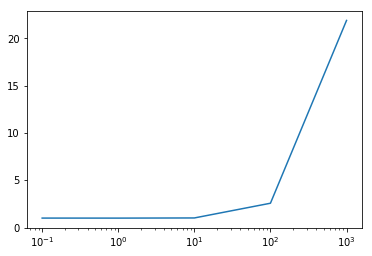

In [86]:
fig, ax = plt.subplots()
ax.semilogx(lambdas, rmse_folds)
plt.show()

In [77]:
rmse_submit = pd.Series(rmse_folds)
final_submit = rmse_submit.to_csv("submit.csv", index=False)